### Appendix A.2: Shape Smoothing Using the Estimated Covariance Surface

In [1]:
devtools::install("../../elasticproc2d", quiet=TRUE, quick=TRUE)

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
library(elasticproc2d)
source("../scripts/load_datasets.R")
set.seed(18)
test_curves <- curves.spiral(n_curves = 10, rotate=FALSE, scale=FALSE, center=TRUE)
set.seed(18)
data_curves2 <- curves.spiral(n_curves = 10, rotate=TRUE, scale=TRUE, center=FALSE)
data_curves1 <- curves.digit3(rotate=TRUE, scale=TRUE, center=FALSE)
knots1 <- seq(0, 1, length = 13)
knots2 <- seq(0, 1, length = 13)

In [4]:
mean3 <- compute_elastic_proc2d_mean(data_curves1, knots1, "smooth", penalty=2, pfit_method="smooth")
mean4 <- compute_elastic_proc2d_mean(data_curves2, knots2, "smooth", penalty=2, pfit_method="smooth")

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

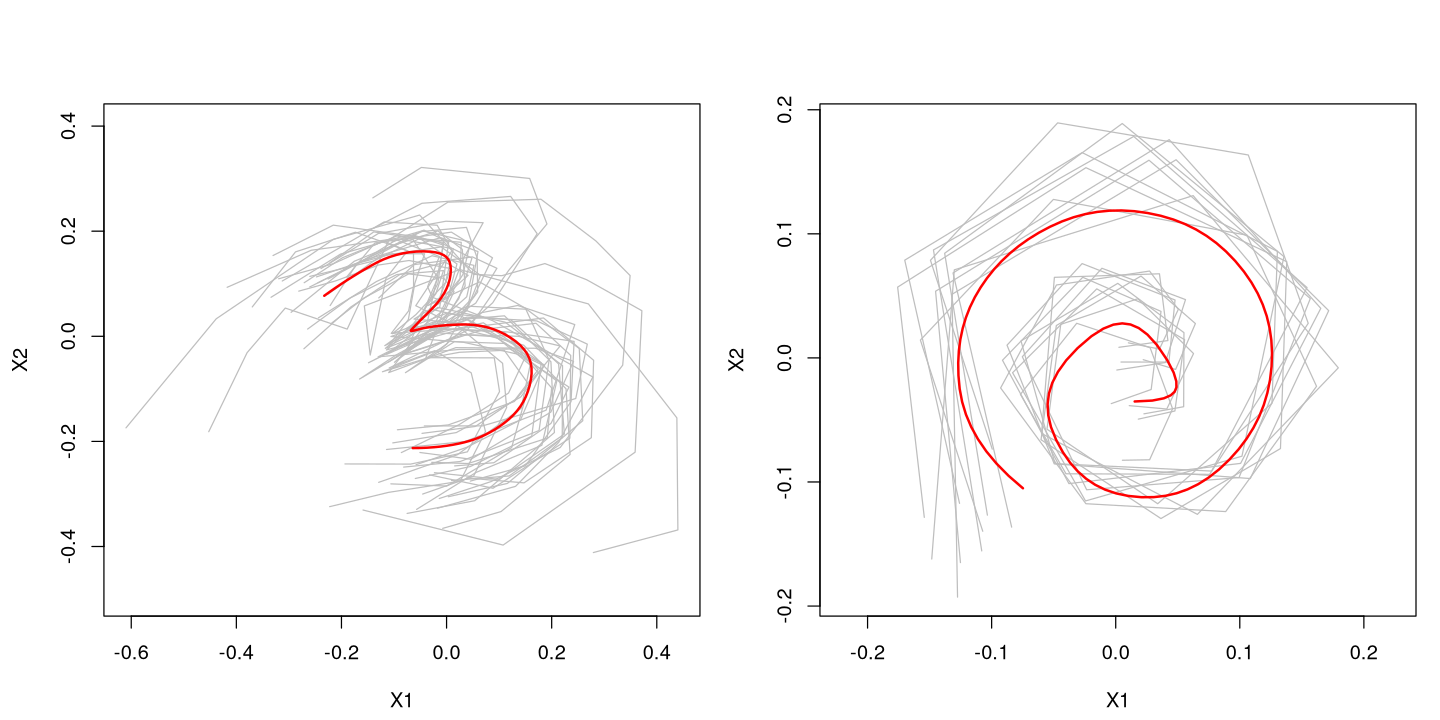

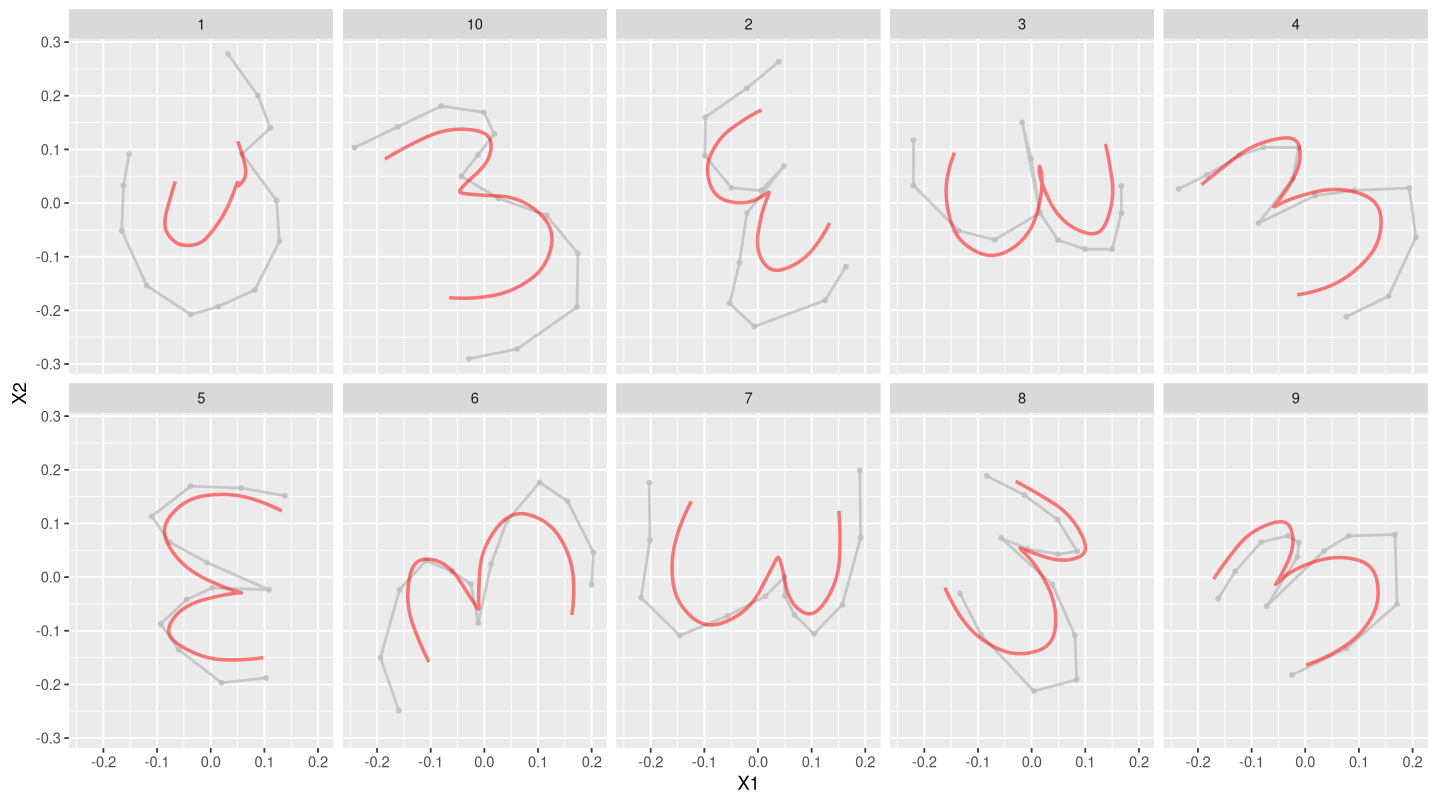

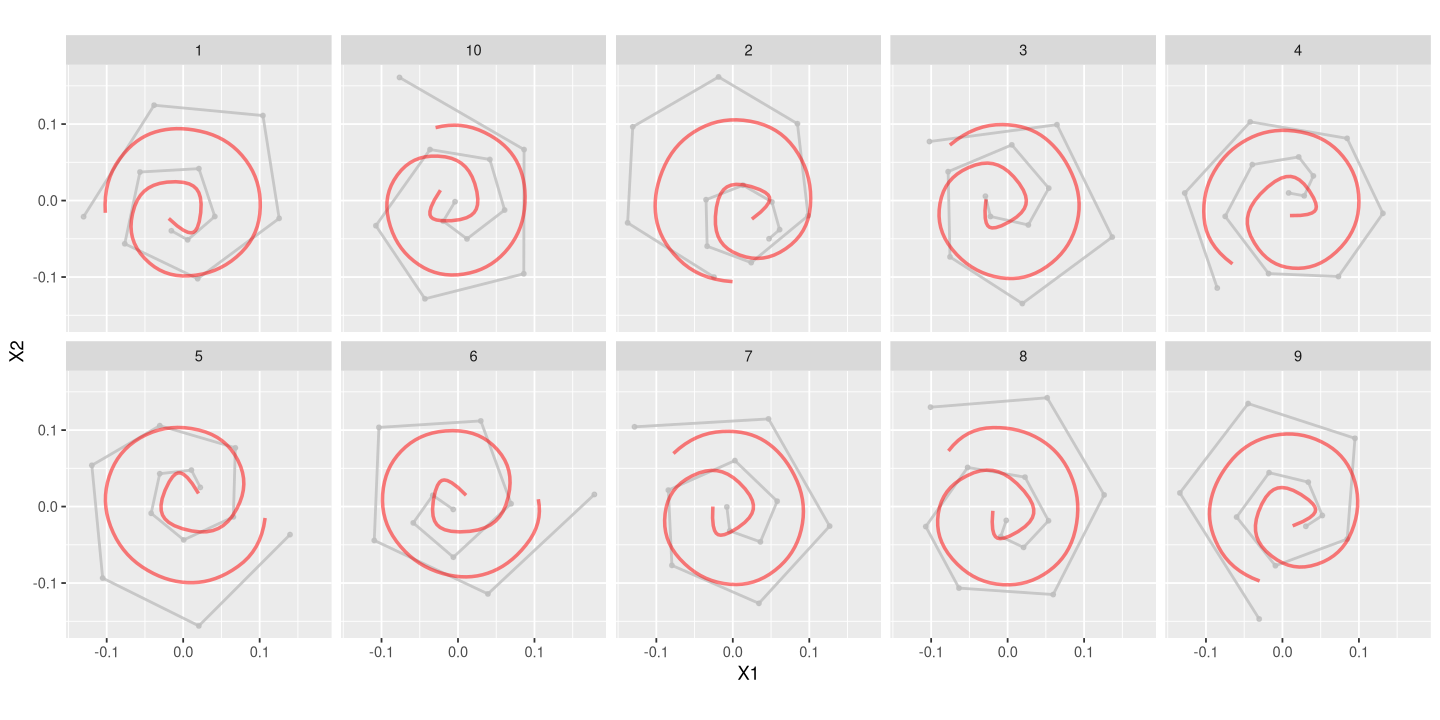

In [5]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2), mar=c(4,4,4,1), oma=c(0.33,0.33,0.33,0))
plot(mean3)
plot(mean4)

pfits.smooth <- lapply(seq_along(mean3$data_curves), function(j){
  knots <- mean3$knots
  type <- mean3$type
  t <- seq(0, 1, by=0.01)
  srv.compl <- elasticproc2d:::make_design(t, knots, type) %*% mean3$fit$pfit_coefs[[j]]
  srv <- data.frame("t" = t, "X1" = Re(srv.compl), "X2" = Im(srv.compl))
  curve <- elasdics::get_points_from_srv(srv)
  center_curve(curve)
})[seq(1,10)]

pfits <- lapply(seq_along(mean3$data_curves), function(j){
    center_curve(mean3$data_curves[[j]])/elasticproc2d:::get_polygon_length(data_curves1[[j]])
})[seq(1,10)]


pfits.smooth2 <- lapply(seq_along(mean4$data_curves), function(j){
  knots <- mean4$knots
  type <- mean4$type
  t <- seq(0, 1, by=0.01)
  srv.compl <- elasticproc2d:::make_design(t, knots, type) %*% mean4$fit$pfit_coefs[[j]]
  srv <- data.frame("t" = t, "X1" = Re(srv.compl), "X2" = Im(srv.compl))
  curve <- elasdics::get_points_from_srv(srv)
  center_curve(curve)
})

pfits2 <- lapply(seq_along(mean4$data_curves), function(j){
    center_curve(mean4$data_curves[[j]])/elasticproc2d:::get_polygon_length(data_curves2[[j]])
})

options(repr.plot.width=12, repr.plot.height=6.7)
ggplot(bind_rows(pfits.smooth, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(data=bind_rows(pfits, .id="id"), aes(x=X1, y=X2, group=id), size = 0.8, color="grey", alpha=0.8) +
    geom_point(data=bind_rows(pfits, .id="id"), aes(x=X1, y=X2, group=id), color="grey", size=1, alpha=0.8) +
    geom_path(aes(group=id), size = 1, color="red", alpha=0.5) +
    coord_fixed() +
    facet_wrap(~id, ncol=5)

options(repr.plot.width=12, repr.plot.height=6)
ggplot(bind_rows(pfits.smooth2, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(data=bind_rows(pfits2, .id="id"), aes(x=X1, y=X2, group=id), size = 0.8, color="grey", alpha=0.8) +
    geom_point(data=bind_rows(pfits2, .id="id"), aes(x=X1, y=X2, group=id), color="grey", size=1, alpha=0.8) +
    geom_path(aes(group=id), size = 1, color="red", alpha=0.5) +
    coord_fixed() +
    facet_wrap(~id, ncol=5)

#### With $\lambda = 0.4$ and ```penalty = 2``` :

In [6]:
mean7 <- compute_elastic_proc2d_mean(data_curves1, knots = knots1, type = "smooth", penalty = 2, pfit_method = "smooth", pfit_pen_factor = 0.4)
mean8 <- compute_elastic_proc2d_mean(data_curves2, knots = knots2, type = "smooth", penalty = 2, pfit_method = "smooth", pfit_pen_factor = 0.4)

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

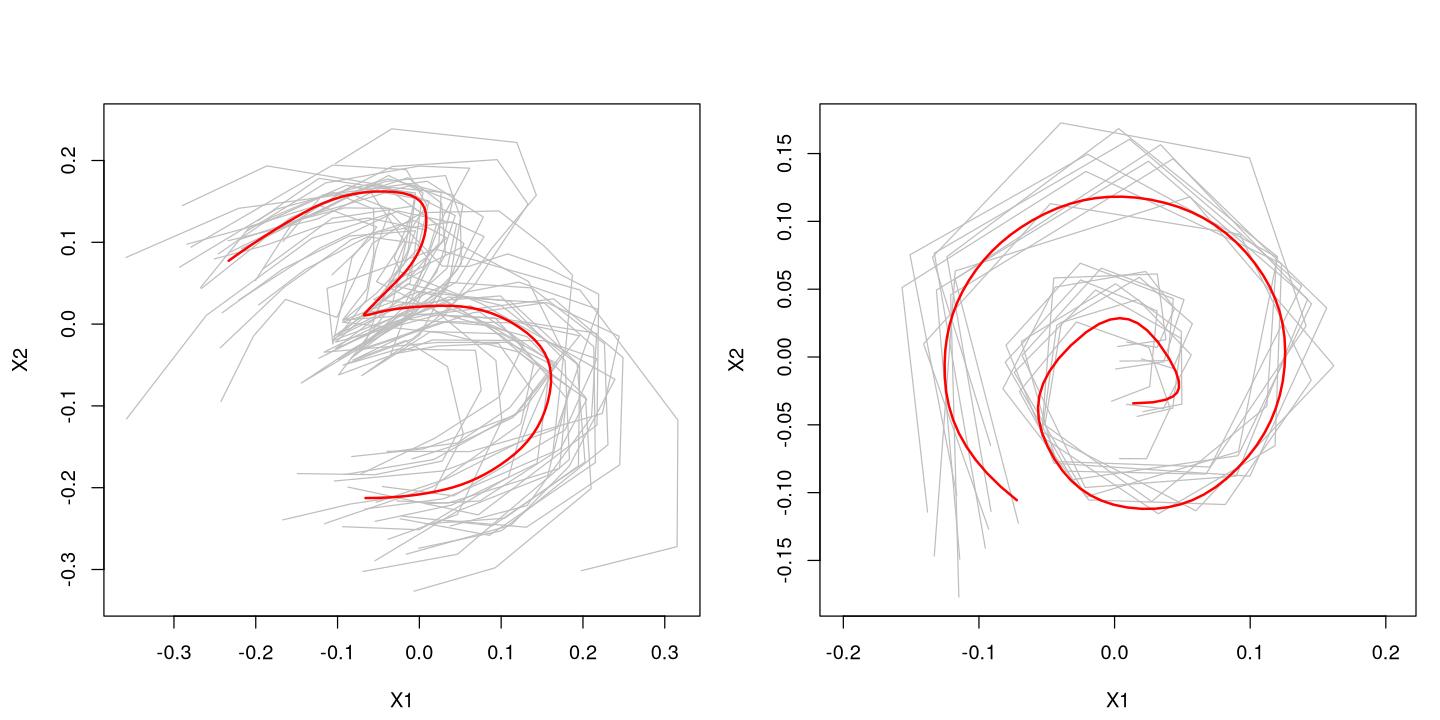

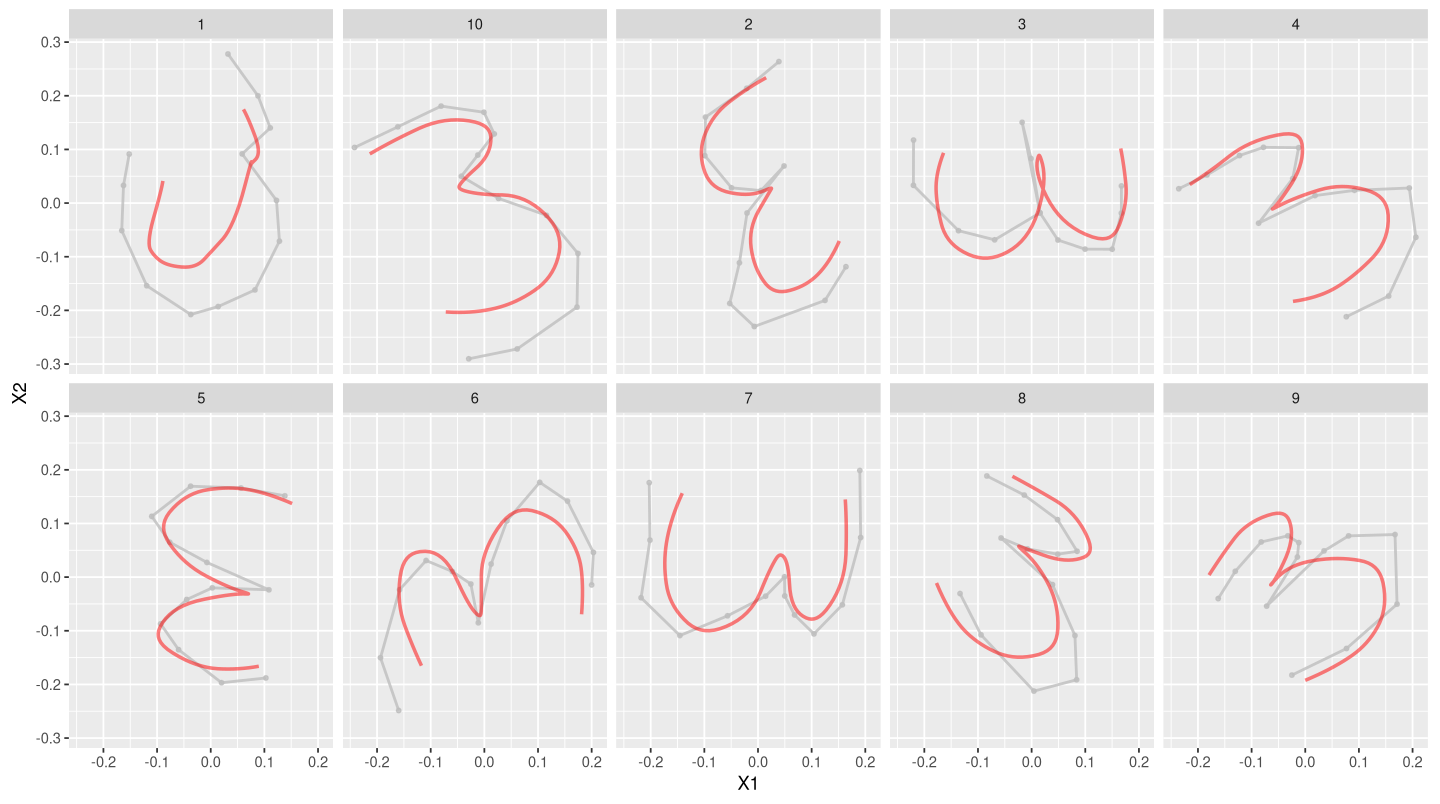

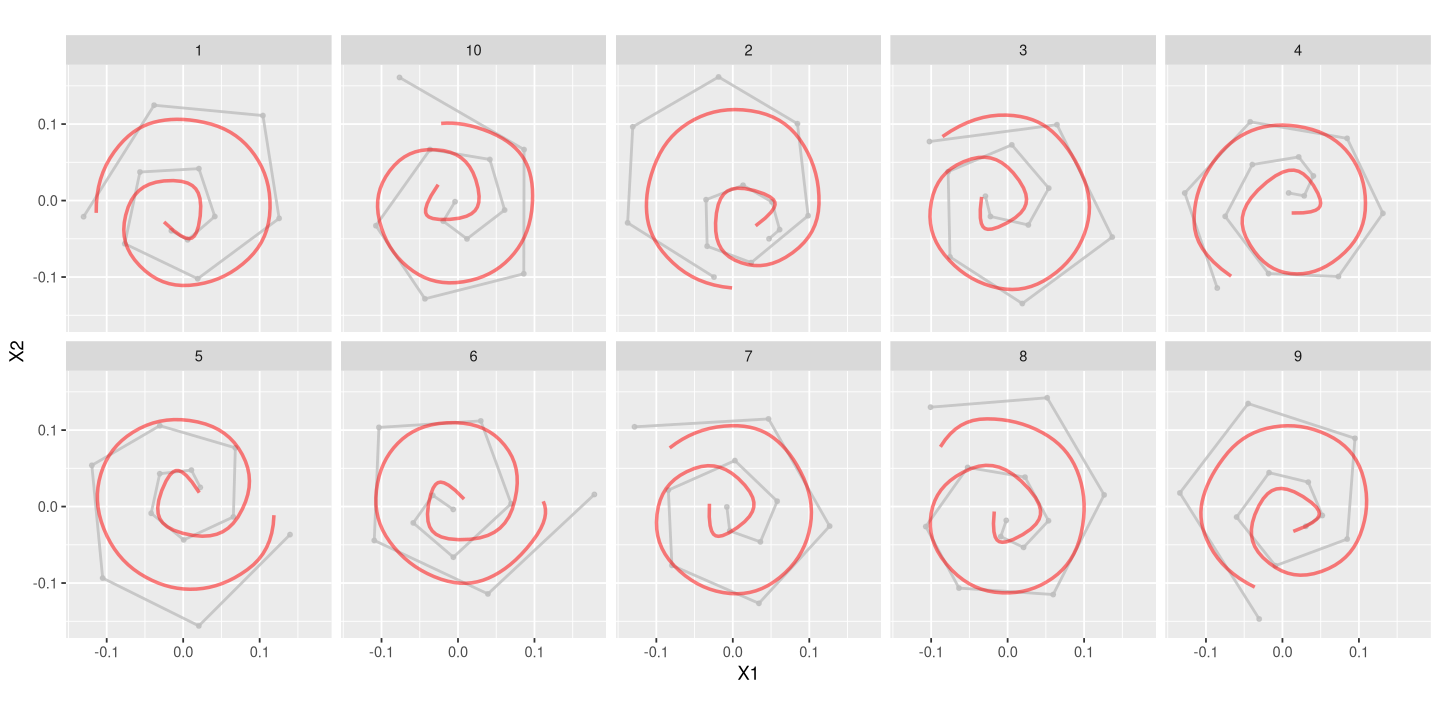

In [8]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2), mar=c(4,4,4,1), oma=c(0.33,0.33,0.33,0))
plot(mean7)
plot(mean8)

pfits.smooth <- lapply(seq_along(mean8$data_curves), function(j){
  knots <- mean8$knots
  type <- mean8$type
  t <- seq(0, 1, by=0.01)
  srv.compl <- elasticproc2d:::make_design(t, knots, type) %*% mean8$fit$pfit_coefs[[j]]
  srv <- data.frame("t" = t, "X1" = Re(srv.compl), "X2" = Im(srv.compl))
  curve <- elasdics::get_points_from_srv(srv)
  center_curve(curve)
})

pfits <- lapply(seq_along(mean8$data_curves), function(j){
    center_curve(mean8$data_curves[[j]])/elasticproc2d:::get_polygon_length(data_curves2[[j]])
})


pfits.smooth2 <- lapply(seq_along(mean7$data_curves), function(j){
  knots <- mean7$knots
  type <- mean7$type
  t <- seq(0, 1, by=0.01)
  srv.compl <- elasticproc2d:::make_design(t, knots, type) %*% mean7$fit$pfit_coefs[[j]]
  srv <- data.frame("t" = t, "X1" = Re(srv.compl), "X2" = Im(srv.compl))
  curve <- elasdics::get_points_from_srv(srv)
  center_curve(curve)
})[seq(1,10)]

pfits2 <- lapply(seq_along(mean7$data_curves), function(j){
    center_curve(mean7$data_curves[[j]])/elasticproc2d:::get_polygon_length(data_curves1[[j]])
})[seq(1,10)]

options(repr.plot.width=12, repr.plot.height=6.7)
ggplot(bind_rows(pfits.smooth2, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(data=bind_rows(pfits2, .id="id"), aes(x=X1, y=X2, group=id), size = 0.8, color="grey", alpha=0.8) +
    geom_point(data=bind_rows(pfits2, .id="id"), aes(x=X1, y=X2, group=id), color="grey", size=1, alpha=0.8) +
    geom_path(aes(group=id), size = 1, color="red", alpha=0.5) +
    coord_fixed() +
    facet_wrap(~id, ncol=5)

options(repr.plot.width=12, repr.plot.height=6)
ggplot(bind_rows(pfits.smooth, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(data=bind_rows(pfits, .id="id"), aes(x=X1, y=X2, group=id), size = 0.8, color="grey", alpha=0.8) +
    geom_point(data=bind_rows(pfits, .id="id"), aes(x=X1, y=X2, group=id), color="grey", size=1, alpha=0.8) +
    geom_path(aes(group=id), size = 1, color="red", alpha=0.5) +
    coord_fixed() +
    facet_wrap(~id, ncol=5)